# Bussiness Task 

The purpose of this project is to use credit scoring techniques that assess the risk in lending to a particular client and build a scorecard model. Credit scoring means applying a statistical model to assign a risk score to a credit application and it is a form of Artificial Intelligence, based on predictive modelling, that assesses the likelihood of a customer defaulting on a credit obligation, becoming delinquent or insolvent.

Setting up a credit scorecard to automate even a partial percentage of new customer account decisions is a smart way to strike the right balance between managing risk and optimizing resources. 

The first step to creating a credit scorecard is to define what the scorecard should predict. There are two main categories of bad accounts that credit managers aim to avoid – those that pay slowly (but will eventually pay, whether it’s 30, or 60 days late) and those that file for bankruptcy or go out of business (and will never be able to pay). This requires a general understanding of a company’s bad accounts in order to choose which data elements make the most sense for the scorecard. 


# Business Goal

Build a machine learning model by utilizing a customer’s historical data to predict the probability of that customer Will be ‘good’ or ‘bad’.

# Import libraries

In [267]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
# from matplotlib.pyplot.bar_label
import seaborn as sns
# import optuna
from scipy import stats
import glob
import random
import datetime

import os
import pickle
# from  datasist.structdata import detect_outliers
from tqdm import tqdm
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)
from datetime import date,timedelta

import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Pre Processing
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Error Metrics 
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


#classefication
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
#import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import plot_confusion_matrix
#clustring 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#pca
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import itertools
from xgboost.sklearn import XGBClassifier
import warnings

# Data preparation

We have two tables application_record and credit_record.
The second table presents the status

STATUS: Status of the credit card account.

0: 1-29 days past due 
1: 30-59 days past due
2: 60-89 days overdue
3: 90-119 days overdue
4: 120-149 days overdue
5: Overdue or bad debts, write-offs for more than 150 days
C: paid off that month
X: No loan for the month

In [11]:
application_record = pd.read_csv("C:/Users/Asus/Desktop/Credit_Card/application_record.csv")

In [12]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [13]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [14]:
application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [150]:
credit_record=pd.read_csv("C:/Users/Asus/Desktop/Credit_Card/credit_record.csv")

In [16]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [17]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


We used info() and head() to validate the data read.
FLAG_MOBIL : Min and Max values are same
CNT_FAM_MEMBERS: Max value is 20 and 75th percentile is 3, so we may want to check for outliers

In [19]:
len(application_record)

438557

In [22]:
application_record['ID'].nunique()

438510

In [20]:
len(credit_record)

1048575

In [23]:
credit_record['ID'].nunique()

45985

In [28]:
len(pd.merge(application_record,credit_record, how='inner', on='ID'))

777715

In [25]:
len(set(application_record['ID']).intersection(credit_record['ID']))

36457

We joined the two tables using ID Variable, there is a drop in the number of rows from 1,048,575 to 777,715. 

No redundancy in the table application_record. In the table credit_record we have just 45985 id unique . From the join we have 36457 Id in common between the two tables.

# Target Variable Creation

The target variable usually takes a binary form, depending on the data, it can be 0 for performing customers and 1 to indicate defaulted customers or customers more than 60 days late on their payment.


ID: The joining key between application data and credit status data
MONTHS_BALANCE: The month of the extracted data is the starting point with 0 is the current month, -1 is the previous month, and so on


In [120]:
credit_record['MONTHS_BALANCE'].value_counts()

-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64

In [121]:
credit_record['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [71]:
month_start=pd.DataFrame(credit_record.groupby(['ID'])['MONTHS_BALANCE'].agg(min))

In [72]:
month_start=month_start.rename(columns={'MONTHS_BALANCE':'month_start'}) 

In [148]:
data=pd.merge(application_record,month_start,how="left",on="ID") 

In [149]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,month_start
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 0 to 438556
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

ID in common between the two tables 36457 Thsis is why we have 36457 begin month not nul.

I choose users who overdue for more than 60 days as target risk users. Those samples are marked as '1', else are '0'.

In [151]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [152]:
credit_record['Traget_p'] = 0
credit_record['Traget_p'][credit_record['STATUS'] =='2']=1
credit_record['Traget_p'][credit_record['STATUS'] =='3']=1 
credit_record['Traget_p'][credit_record['STATUS'] =='4']=1 
credit_record['Traget_p'][credit_record['STATUS'] =='5']=1

C:\Users\Asus\AppData\Local\Temp\ipykernel_13640\272779585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_record['Traget_p'][credit_record['STATUS'] =='2']=1
C:\Users\Asus\AppData\Local\Temp\ipykernel_13640\272779585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_record['Traget_p'][credit_record['STATUS'] =='3']=1
C:\Users\Asus\AppData\Local\Temp\ipykernel_13640\272779585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [153]:
res1=credit_record.groupby('ID').count()

In [154]:
res1

,MONTHS_BALANCE,STATUS,Traget_p
ID,,,
5001711,4,4,4
5001712,19,19,19
5001713,22,22,22
5001714,15,15,15
5001715,60,60,60
...,...,...,...
5150482,18,18,18
5150483,18,18,18
5150484,13,13,13


In [155]:
res2=credit_record.groupby('ID').max()

In [156]:
res2

,MONTHS_BALANCE,STATUS,Traget_p
ID,,,
5001711,0,X,0
5001712,0,C,0
5001713,0,X,0
5001714,0,X,0
5001715,0,X,0
...,...,...,...
5150482,-11,C,0
5150483,0,X,0
5150484,0,C,0


In [158]:
res2 = res2[['Traget_p']]

In [159]:
res2

,Traget_p
ID,
5001711,0
5001712,0
5001713,0
5001714,0
5001715,0
...,...
5150482,0
5150483,0
5150484,0


In [160]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,month_start
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN


In [161]:
data=pd.merge(data,res2,how='inner',on='ID')

In [162]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,month_start,Traget_p
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,-11.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-23.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-32.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,-9.0,1


In [119]:
print(res2['Traget_p'].value_counts())
res2['Traget_p'].value_counts(normalize=True)

0    45318
1      667
Name: Traget_p, dtype: int64


0    0.985495
1    0.014505
Name: Traget_p, dtype: float64

The data is highly unbalanced - with a bad rate of 1.4%.

In [123]:
print(data['Traget_p'].value_counts())
data['Traget_p'].value_counts(normalize=True)

0    35841
1      616
Name: Traget_p, dtype: int64


0    0.983103
1    0.016897
Name: Traget_p, dtype: float64

# Data cleaning

- check column type.
- drop un necessary column.
- check duplicate data
- check missing value.
- dealing with missing value
- Dealing with outliers

We have a list of Credit Card Applications features and Label variables. We want to understand the distribution of these variables, whether some of these variables have missing values.


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [126]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
# source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

missing_values_table(data)

Your selected dataframe has 20 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
OCCUPATION_TYPE,11323,31.1


In [163]:
# filling null data 
data['OCCUPATION_TYPE'] =data['OCCUPATION_TYPE'].replace(np.nan,'others')

Only Occupation Type is missing for 32% of the applicants.

In [127]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,month_start,Traget_p
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193,0.016897
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [164]:
data.drop('FLAG_MOBIL',inplace=True,axis=1)

FLAG_MOBIL takes only a single value. So, not useful for the analysis

****duplicate value

In [132]:
data.duplicated().sum()

0

As we can see we have no duplicate value ,so move further.

In [165]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,month_start,Traget_p
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,others,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,others,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,-26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,0,0,0,Managers,2.0,-11.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,-23.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,-32.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,0,0,0,Sales staff,2.0,-9.0,1


# Feature Engineering

We have to create new usefull variables extract from DAYS_BIRTH and DAYS_EMPLOYED.

In [321]:
## This function takes no of days and convert it into their datetime format
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

## This Function takes value of colunn Days of Employed and convert it into datetime format
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')

In [ ]:
data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(Date_of_Birth)
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(Date_of_Birth)

In [168]:
#let's create a function to calculate age of the employee
def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age

In [169]:
data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(AGE)


In [170]:
data.rename(columns={'DAYS_BIRTH':'Age'},inplace=True)
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(AGE)

In [173]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,month_start,Traget_p
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,others,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,others,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,0,1,1,Sales staff,1.0,-26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,47,6,0,0,0,Managers,2.0,-11.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,34,3,0,1,1,Medicine staff,2.0,-23.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,34,3,0,1,1,Medicine staff,2.0,-32.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49,1,0,0,0,Sales staff,2.0,-9.0,1


# Data Visualization

Data visualization is a way to represent information graphically helping the reader to achieve quick insights.

In [179]:
def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()


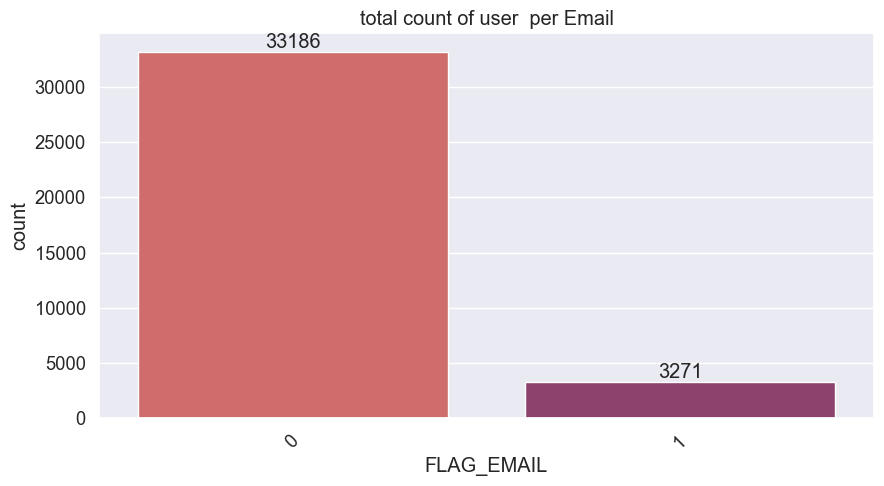

In [180]:
categorical_plotting(data,'FLAG_EMAIL','total count of user  per Email')

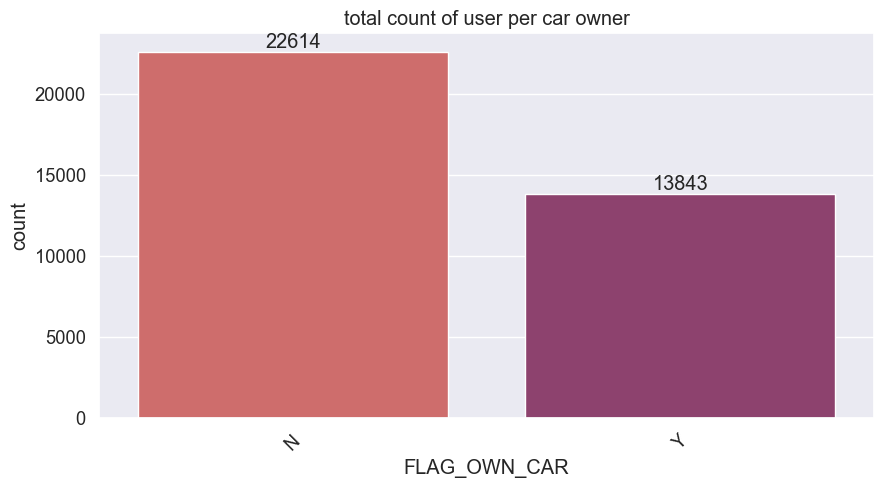

In [187]:
categorical_plotting(data,'FLAG_OWN_CAR','total count of user per car owner')

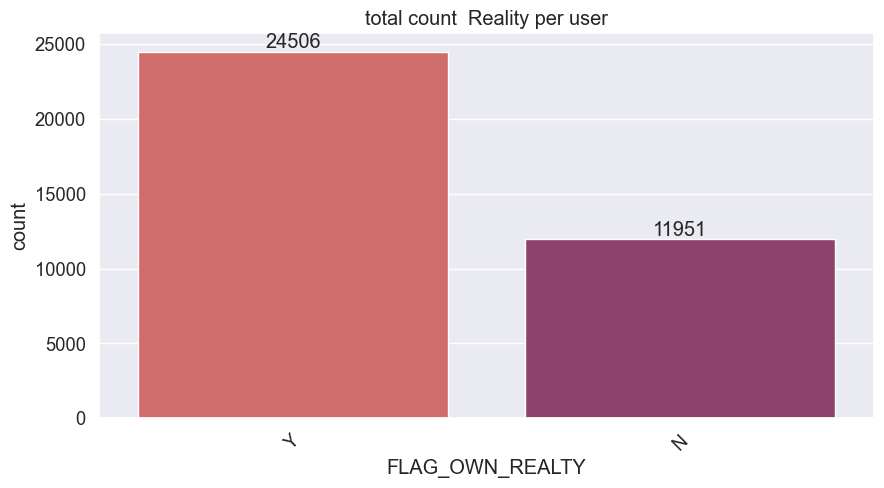

In [189]:
categorical_plotting(data,'FLAG_OWN_REALTY','total count  Reality per user')

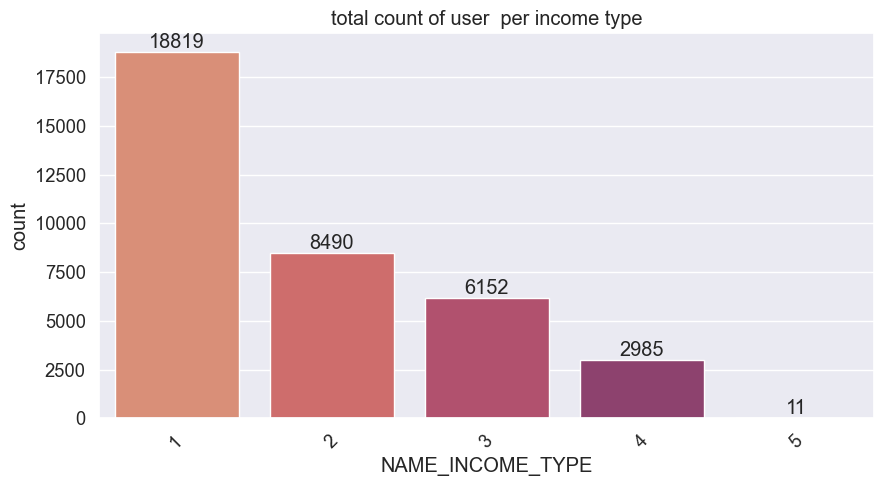

In [324]:
categorical_plotting(data,'NAME_INCOME_TYPE','total count of user  per income type')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


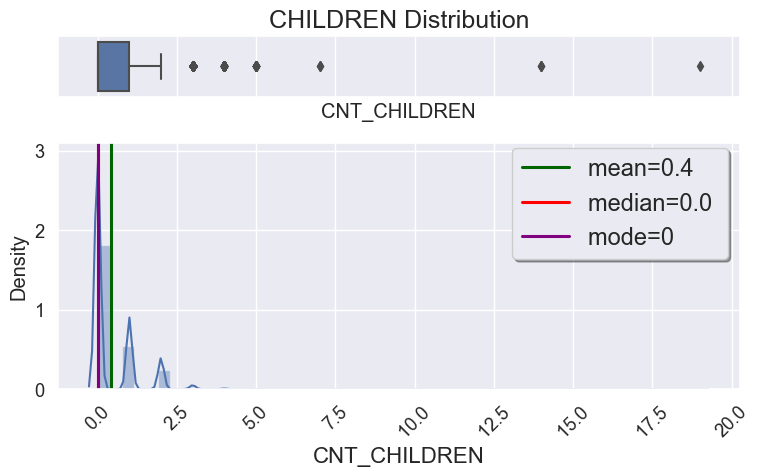

In [182]:
numerical_plotting(data,'CNT_CHILDREN','CHILDREN Distribution',' ')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


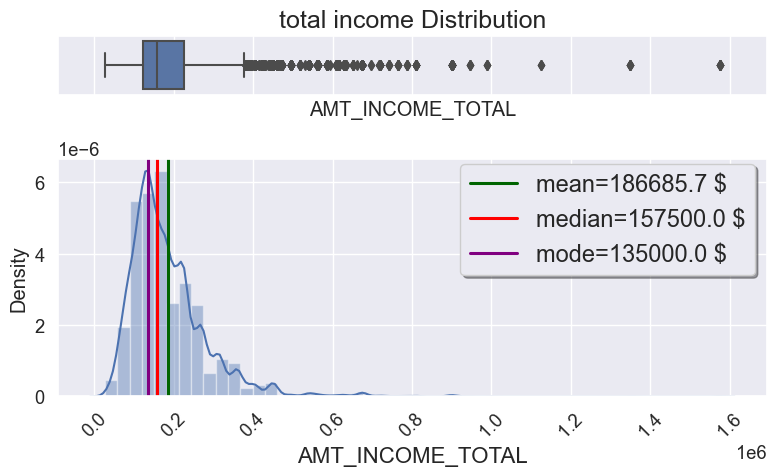

In [184]:
numerical_plotting(data,'AMT_INCOME_TOTAL','total income Distribution',' $')

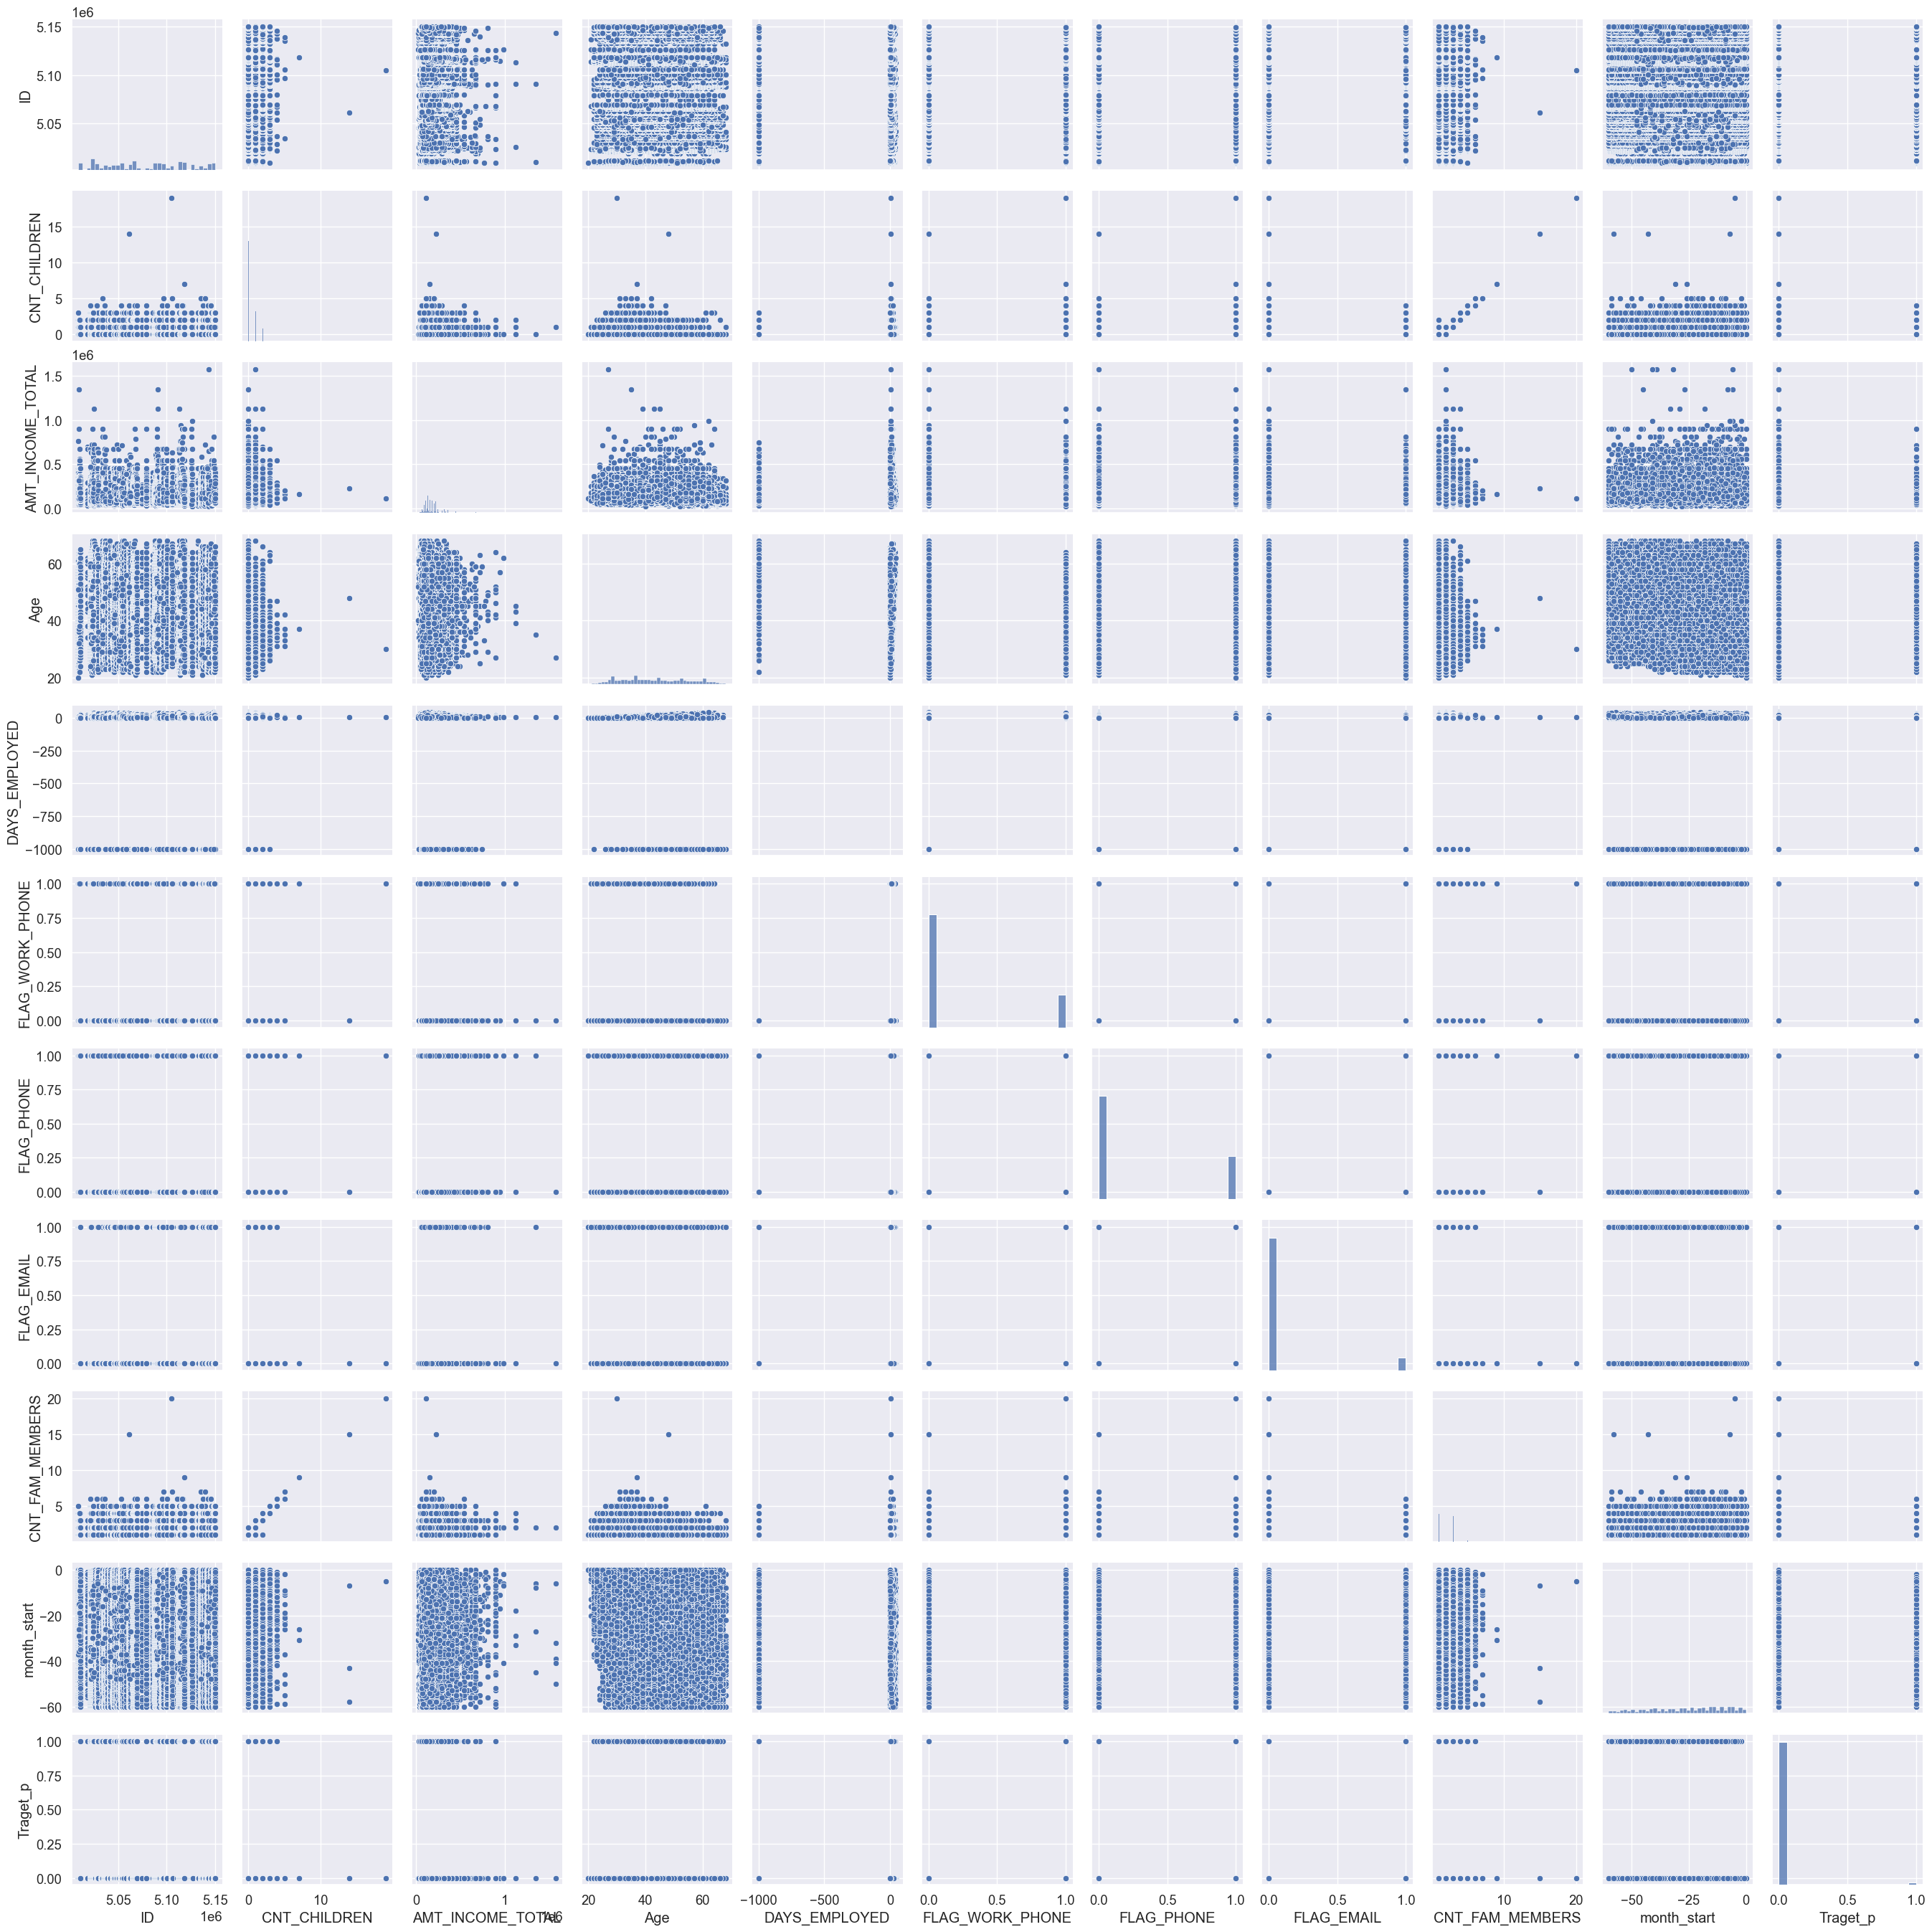

In [175]:
sns.pairplot(data=data )

# Correlation

<AxesSubplot:>

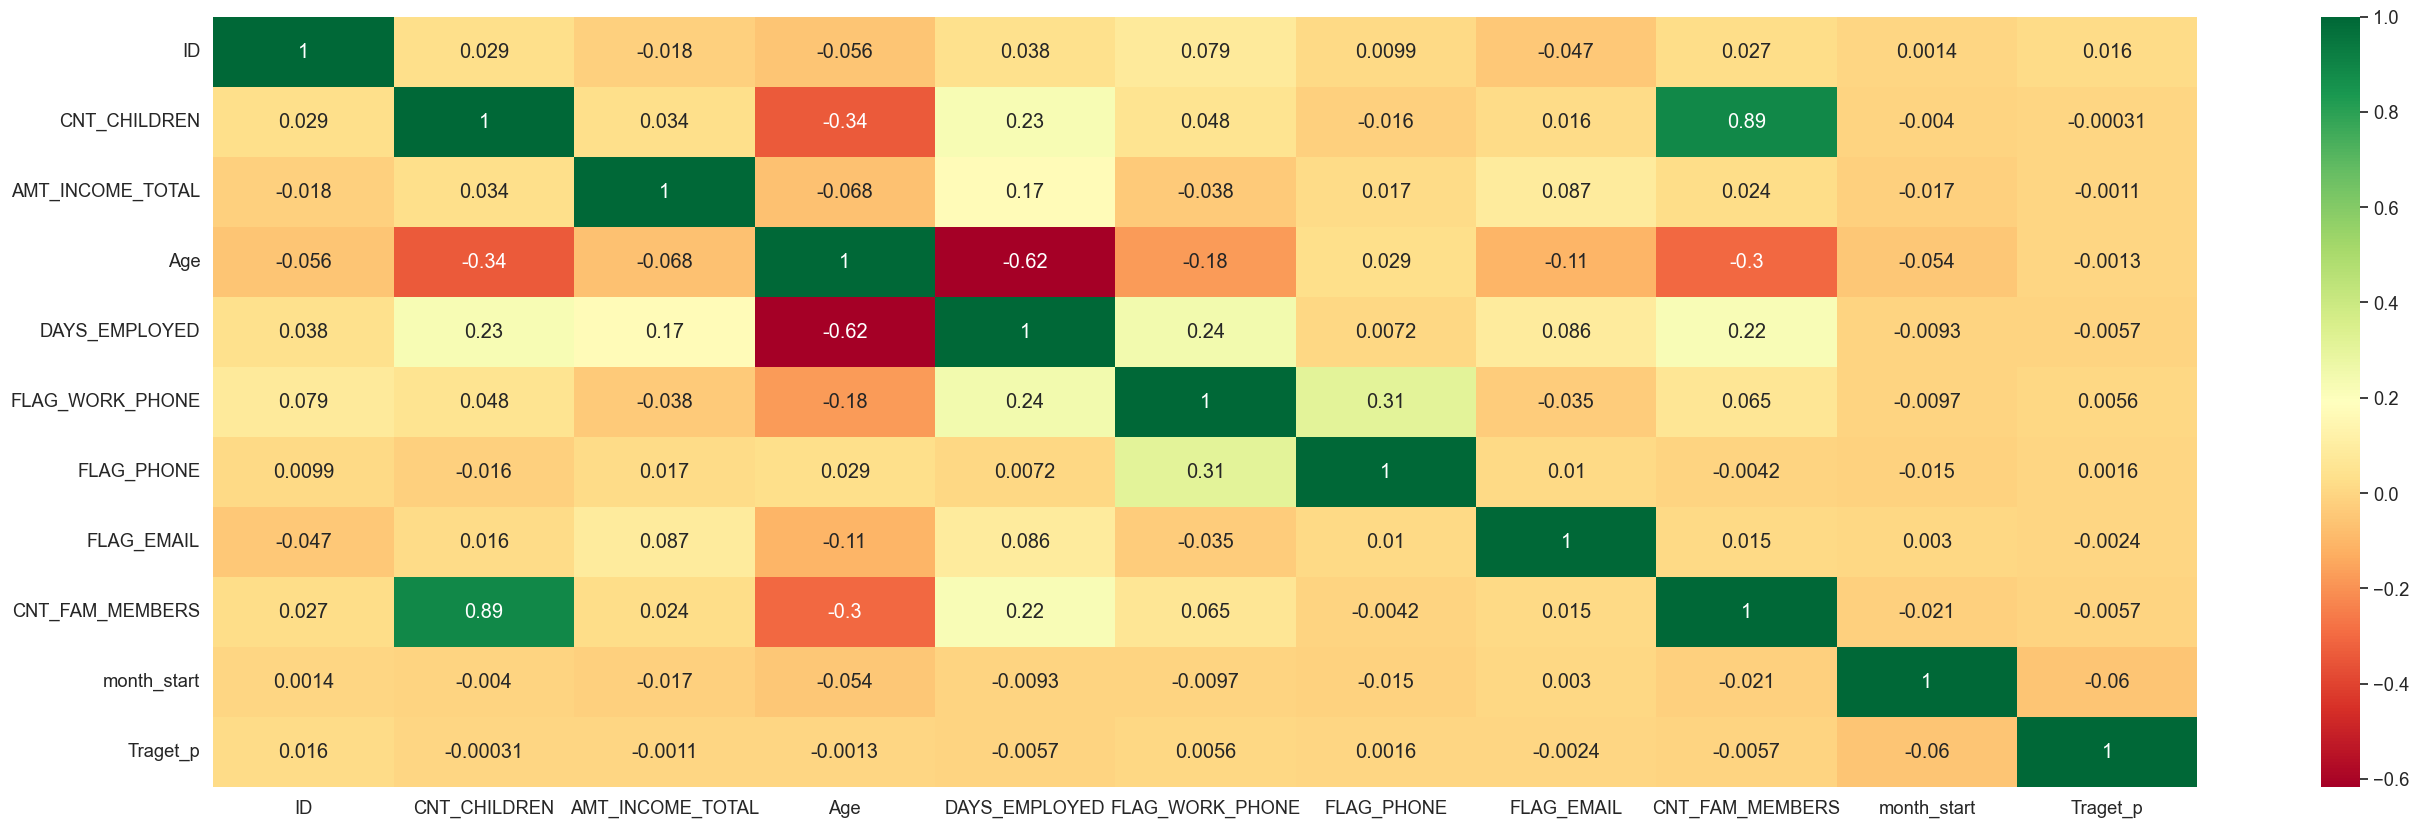

In [176]:
plt.figure(figsize=(32,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

# Dealing with categorical data

Convert categorical variable into dummy/indicator variables. 

In [245]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,month_start,Traget_p
0,5008804,M,Y,Y,0,427500.0,1,2,3,4,32,12,1,0,0,others,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,1,2,3,4,32,12,1,0,0,others,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,1,Secondary / secondary special,1,1,58,3,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,2,Secondary / secondary special,Single / not married,1,52,8,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,2,Secondary / secondary special,Single / not married,1,52,8,0,1,1,Sales staff,1.0,-26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,1,Secondary / secondary special,1,1,47,6,0,0,0,Managers,2.0,-11.0,1
36453,5149834,F,N,Y,0,157500.0,2,2,1,1,34,3,0,1,1,Medicine staff,2.0,-23.0,1
36454,5149838,F,N,Y,0,157500.0,3,2,1,1,34,3,0,1,1,Medicine staff,2.0,-32.0,1
36455,5150049,F,N,Y,0,283500.0,1,Secondary / secondary special,1,1,49,1,0,0,0,Sales staff,2.0,-9.0,1


In [227]:
# One hot Encoding using get_dummies function
data_f=pd.get_dummies(data, columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',"NAME_INCOME_TYPE",'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'])

In [228]:
data_f

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,month_start,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_others
0,5008804,0,427500.0,32,12,1,0,0,2.0,-15.0,...,0,0,0,0,0,0,0,0,0,1
1,5008805,0,427500.0,32,12,1,0,0,2.0,-14.0,...,0,0,0,0,0,0,0,0,0,1
2,5008806,0,112500.0,58,3,0,0,0,2.0,-29.0,...,0,0,0,0,0,0,0,1,0,0
3,5008808,0,270000.0,52,8,0,1,1,1.0,-4.0,...,0,0,0,0,0,1,0,0,0,0
4,5008809,0,270000.0,52,8,0,1,1,1.0,-26.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,315000.0,47,6,0,0,0,2.0,-11.0,...,0,1,0,0,0,0,0,0,0,0
36453,5149834,0,157500.0,34,3,0,1,1,2.0,-23.0,...,0,0,1,0,0,0,0,0,0,0
36454,5149838,0,157500.0,34,3,0,1,1,2.0,-32.0,...,0,0,1,0,0,0,0,0,0,0
36455,5150049,0,283500.0,49,1,0,0,0,2.0,-9.0,...,0,0,0,0,0,1,0,0,0,0


In [229]:
#get categorical columns
catCols = [col for col in data_f.columns if data_f[col].dtype=="O"]
catCols

[]

# Imbalanced Dataset

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [230]:
data_f.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'Age', 'DAYS_EMPLOYED',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'month_start', 'Traget_p', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_1', 'NAME_INCOME_TYPE_2',
       'NAME_INCOME_TYPE_3', 'NAME_INCOME_TYPE_4', 'NAME_INCOME_TYPE_5',
       'NAME_EDUCATION_TYPE_2', 'NAME_EDUCATION_TYPE_3',
       'NAME_EDUCATION_TYPE_4', 'NAME_EDUCATION_TYPE_5',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_1', 'NAME_FAMILY_STATUS_3', 'NAME_FAMILY_STATUS_4',
       'NAME_FAMILY_STATUS_5', 'NAME_FAMILY_STATUS_Single / not married',
       'NAME_HOUSING_TYPE_1', 'NAME_HOUSING_TYPE_2', 'NAME_HOUSING_TYPE_3',
       'NAME_HOUSING_TYPE_4', 'NAME_HOUSING_TYPE_5', 'NAME_HOUSING_TYPE_6',
       'OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Cleaning staff',
       'OCCUPATION_TYPE_Co

In [236]:
Y = data_f['Traget_p']
X=data_f.drop('Traget_p',axis=1)

In [209]:
from imblearn.combine import SMOTETomek

In [233]:
smk=SMOTETomek(random_state=12)

In [234]:
data_f.shape

(36457, 57)

In [237]:
x_res,y_res=smk.fit_resample(X,Y)

In [240]:
from collections import Counter
print('original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

original dataset shape Counter({0: 35841, 1: 616})
Resampled dataset shape Counter({0: 35376, 1: 35376})


# Model Building

The creation of different samples for training and testing (30%) helps us evaluate model performance.

Precision is a metric that quantifies the number of correct positive predictions made. Precision, therefore, calculates the accuracy for the minority class. It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.

Accuracy is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. Unlike precision that only comments on the correct positive predictions out of all positive predictions, recall provides an indication of missed positive predictions.

In [242]:
X_train, X_test, y_train, y_test = train_test_split(x_res,y_res, 
                                                    stratify=y_res, test_size=0.3,
                                                    random_state = 10086)

In [244]:
X_train.shape,y_train.shape

((49526, 56), (49526,))

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.
Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node.

In [289]:
def feature_importance (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.feature_importances_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()


# -> Decision Tree

In [286]:
model_DT = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model_DT.fit(X_train, y_train)
y_predict = model_DT.predict(X_test)


In [287]:
print("Precision   : {:.2f} %".format(np.round(precision_score(y_test, y_predict),4)*100))
print("Recall      : {:.2f} %".format(np.round(recall_score(y_test, y_predict),4)*100))
print("Accurcy     : {:.2f} %".format(np.round(accuracy_score(y_test, y_predict),4)*100))

Percition   : 95.91 %
Recall      : 96.49 %
Accurcy     : 96.19 %


       0      1
0  10176    437
1    372  10241


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


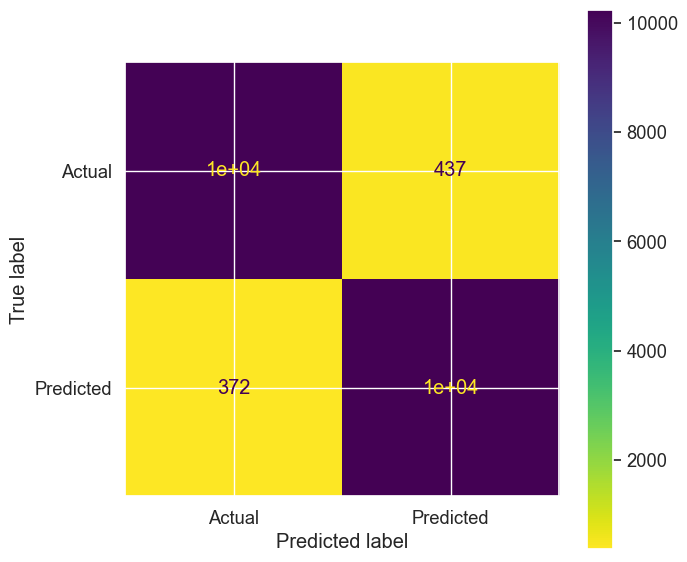

In [288]:
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
disp = plot_confusion_matrix(model_DT, X_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)

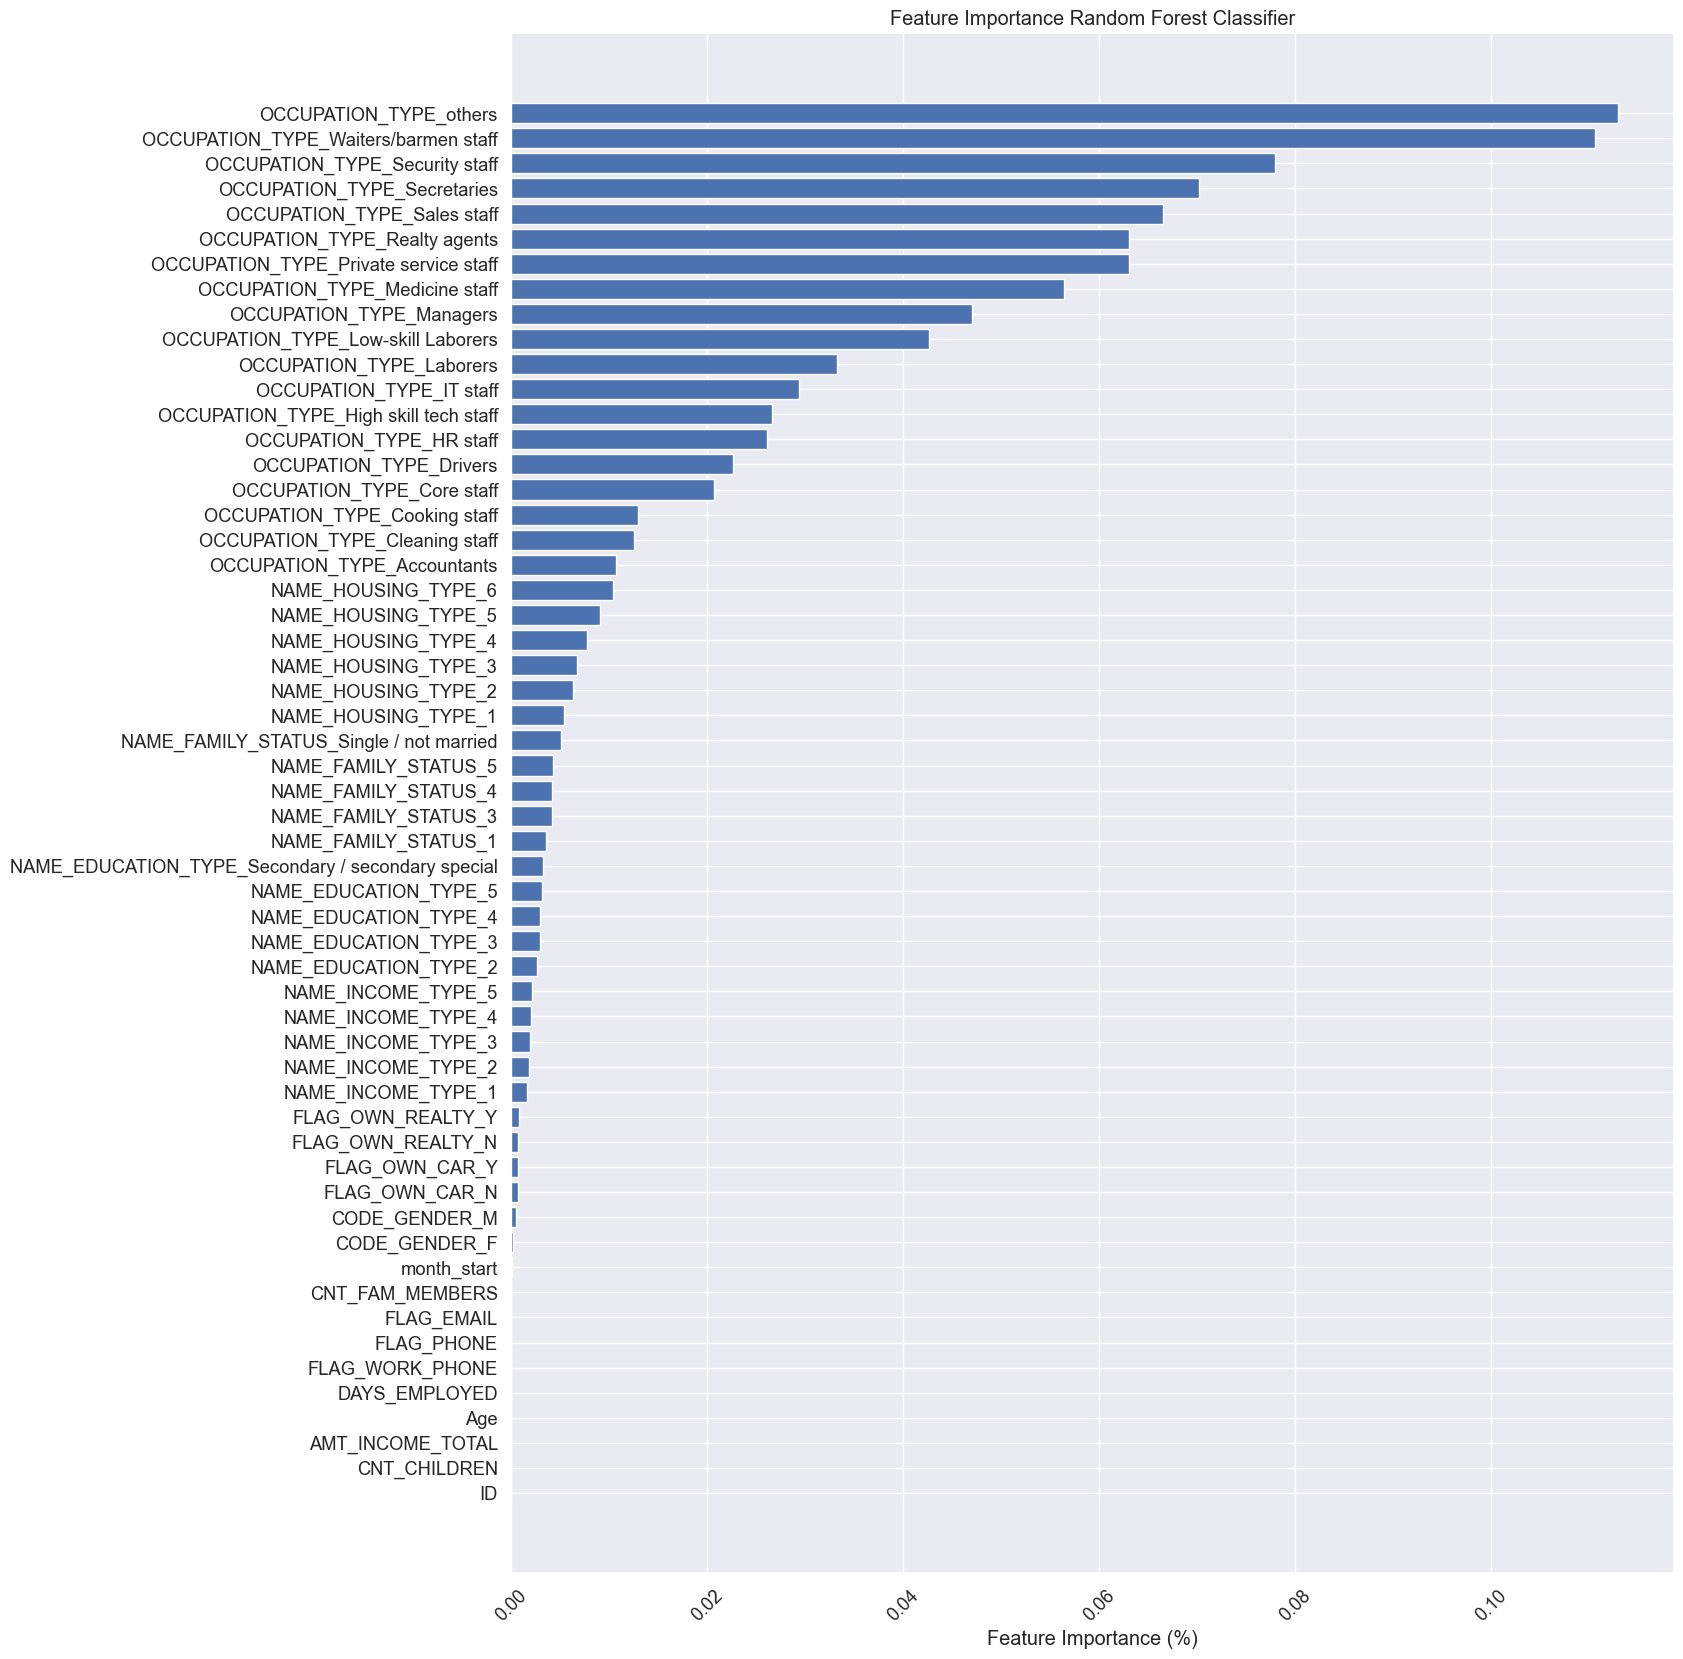

In [283]:
feature_importance(X,model_DT,' Random Forest Classifier')

# RandomForest

In [306]:
model_RF = RandomForestClassifier(n_estimators=200,
                              max_depth=100,
                             criterion='gini',
                              min_samples_leaf=16
                              )
model_RF.fit(X_train, y_train)
y_predict = model_RF.predict(X_test)


In [307]:
print("Percition   : {:.2f} %".format(np.round(precision_score(y_test, y_predict),4)*100))
print("Recall      : {:.2f} %".format(np.round(recall_score(y_test, y_predict),4)*100))
print("Accurcy     : {:.2f} %".format(np.round(accuracy_score(y_test, y_predict),4)*100))

Percition   : 99.39 %
Recall      : 97.51 %
Accurcy     : 98.45 %


       0      1
0  10549     64
1    264  10349


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


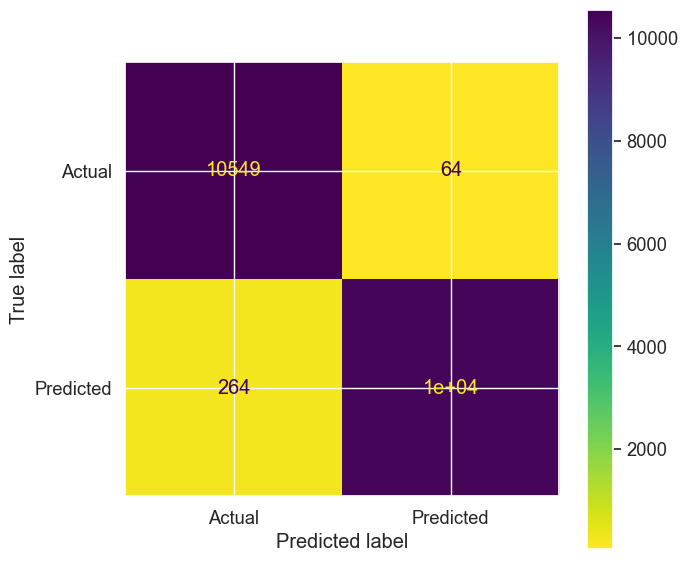

In [308]:
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
disp = plot_confusion_matrix(model_RF, X_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)

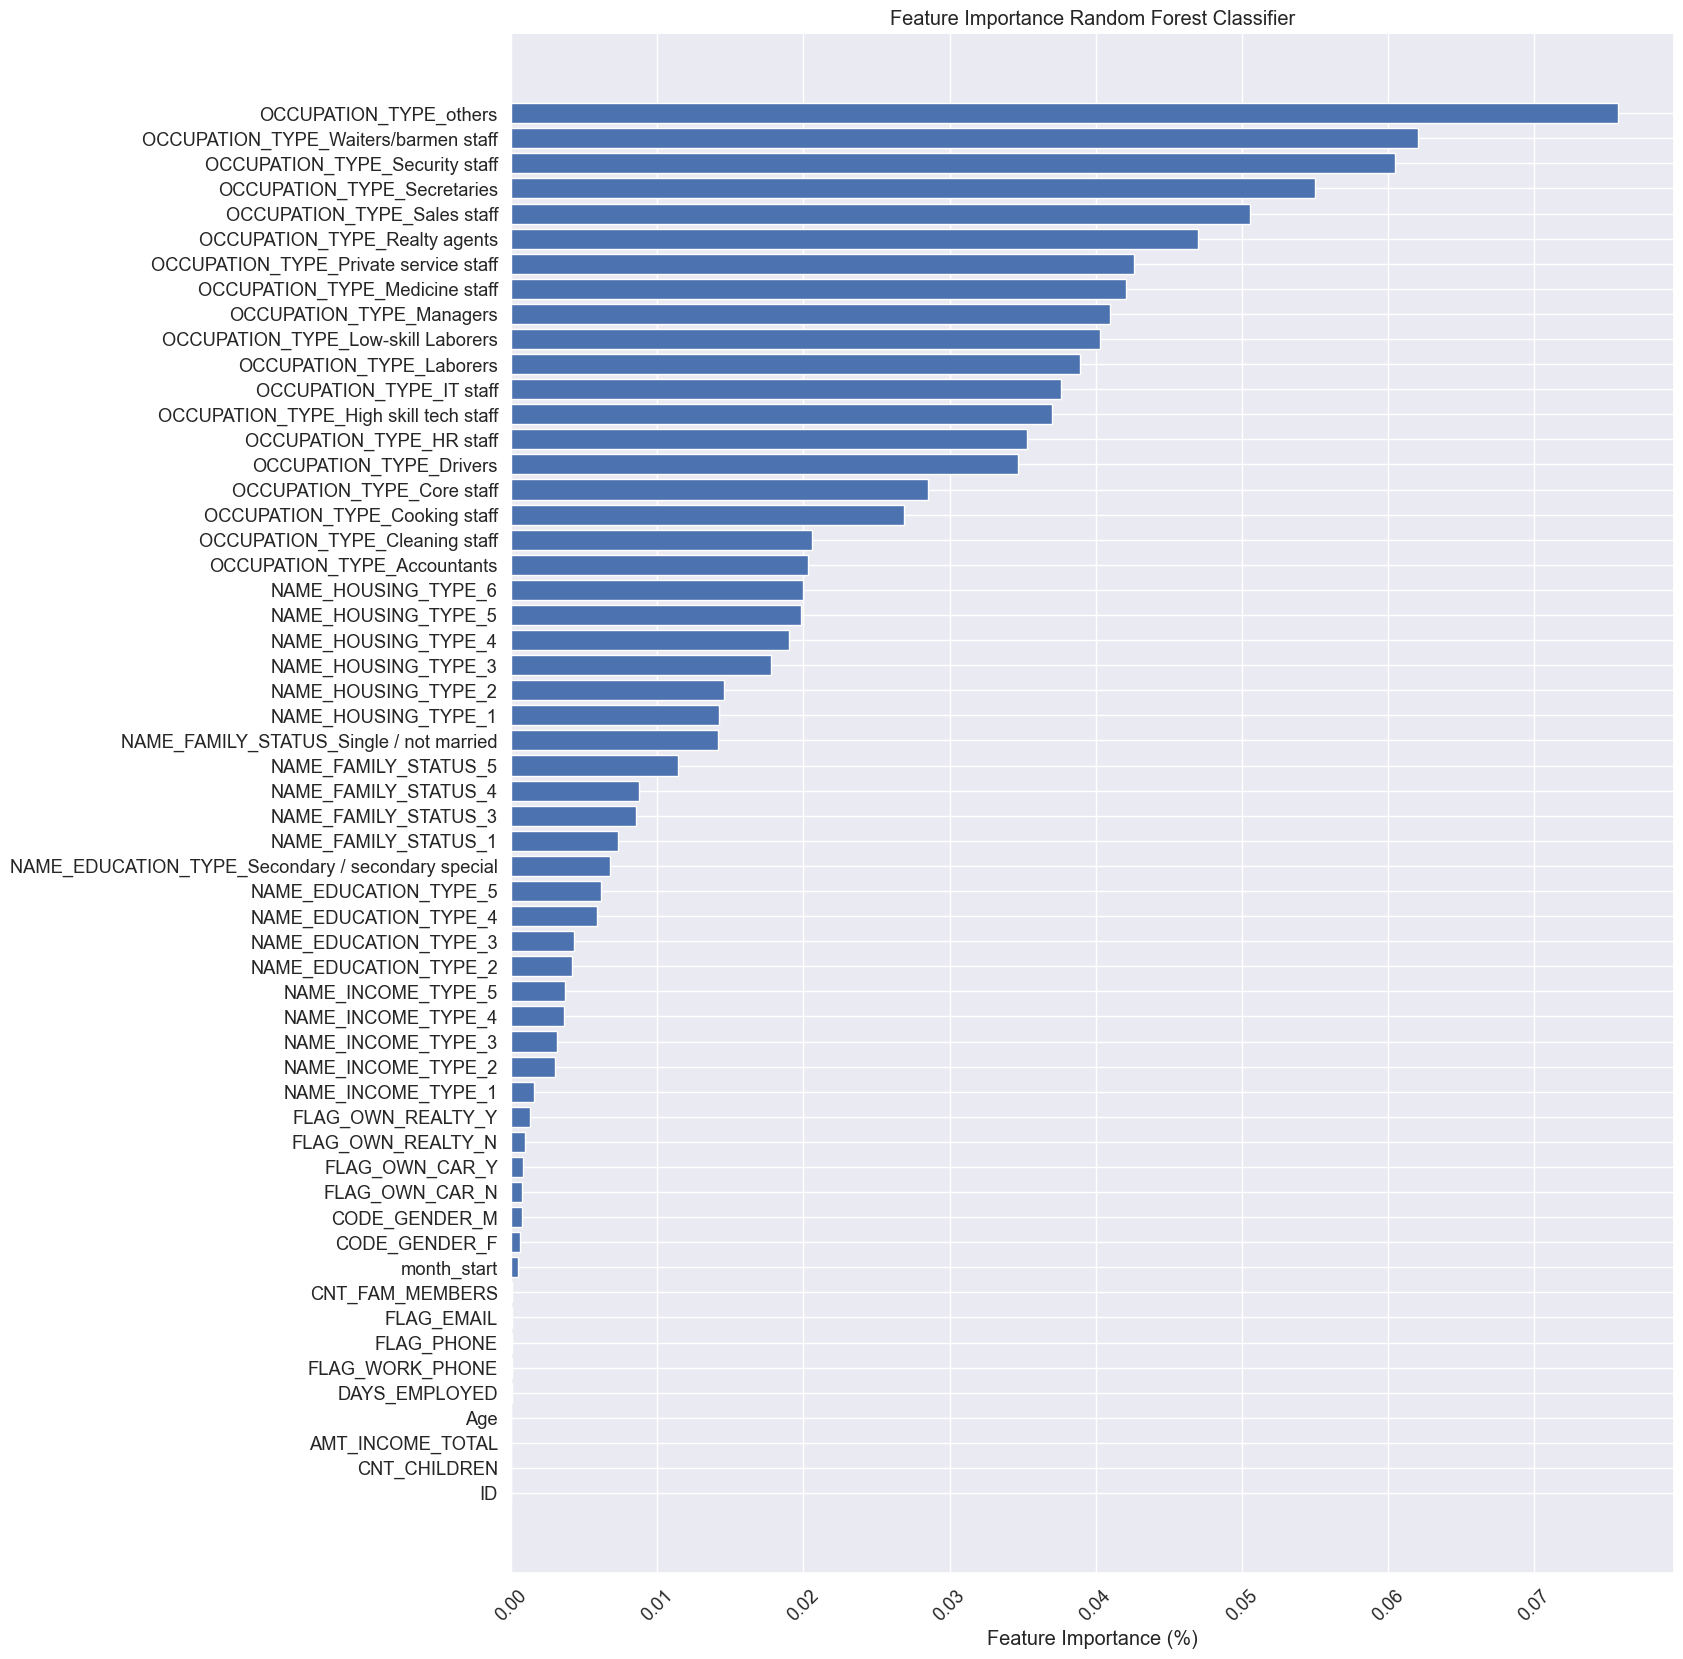

In [309]:
feature_importance(X,model_RF,' Random Forest Classifier')

# XGBoost

In [298]:
model_XGB = XGBClassifier(
 learning_rate =0.3,
 n_estimators=100,
 max_depth=15,
 min_child_weight=6,
 gamma=0.0,
 subsample=0.9,
 colsample_bytree=0.6,
 objective= 'binary:logistic'
)

model_XGB.fit(X_train, y_train)
y_predict = model_XGB.predict(X_test)


In [299]:
print("Percition   : {:.2f} %".format(np.round(precision_score(y_test, y_predict),4)*100))
print("Recall      : {:.2f} %".format(np.round(recall_score(y_test, y_predict),4)*100))
print("Accurcy     : {:.2f} %".format(np.round(accuracy_score(y_test, y_predict),4)*100))

Percition   : 99.42 %
Recall      : 99.46 %
Accurcy     : 99.44 %


       0      1
0  10551     62
1     57  10556


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


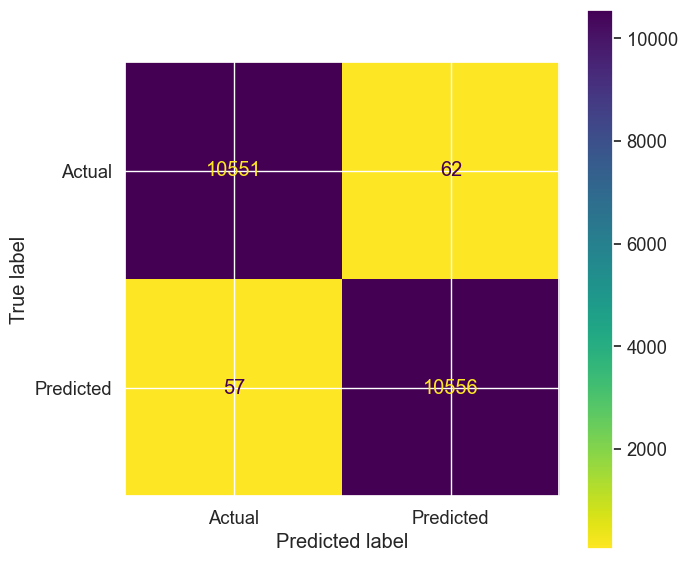

In [301]:
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
disp = plot_confusion_matrix(model_XGB, X_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)


We have used the XGBoost algorithm and it gave us a good accuracy level. 